In [17]:
import numpy as np
import pandas as pd
import math
import operator

In [4]:
trainingset = pd.read_csv("/home/rajat/Documents/ML self projects/Datasets/iris.csv")

In [23]:
trainingset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
trainingset.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
trainingset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
trainingset['Name'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Name, dtype: int64

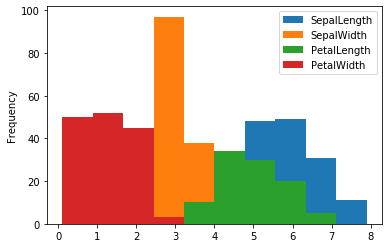

In [38]:
 plotting = trainingset.plot.hist()`

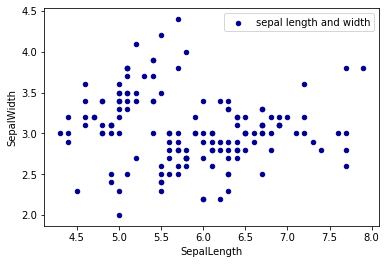

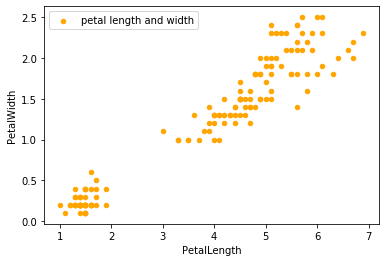

In [8]:
ax = trainingset.plot.scatter(x='SepalLength', y='SepalWidth', color='DarkBlue', label='sepal length and width');
bx = trainingset.plot.scatter(x='PetalLength', y='PetalWidth', color='orange', label='petal length and width');


# Eucladian dist calulation formula

In [9]:
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)


# K-nn algo in action

In [19]:
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    
    for x in range(len(trainingSet)):
        
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
 

    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))

 
    neighbors = []
    
    #taking top k neighbours
    for x in range(k):
        neighbors.append(sorted_d[x][0])

    commonLabels = {}
    
    # taking the labels of k nearst neighbors from training data 
    for x in range(len(neighbors)):
        labels= trainingSet.iloc[neighbors[x]][-1]
 
        if labels in commonLabels:
            commonLabels[labels] += 1
        else:
            commonLabels[labels] = 1
    

    #soting from higher occurance to lower occurance of labels
    sortedLabels = sorted(commonLabels.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedLabels[0][0], neighbors)
    




# Testing our Knn for diff values of k

In [41]:
testSet = [[4.2, 1.6, 2.6, 2.6]]
test = pd.DataFrame(testSet)

# Setting number of neighbors = 1
print('\n\nWith 1 Nearest Neighbour \n\n')
k = 1

# Running KNN model
result,neigh = knn(trainingset, test, k)
print('\nPredicted Label of the Testdata = ', result)
print('\nNearest Neighbour of the Testdata = ',neigh)


print('\n\nWith 3 Nearest Neighbours\n\n')
# Setting number of neighbors = 3 
k = 3  
result,neigh = knn(trainingset, test, k)  
print('\nPredicted label of the Testdata = ',result)
print('\nNearest Neighbours of the Testdata  = ',neigh)

print('\n\nWith 5 Nearest Neighbours\n\n')
# Setting number of neighbors = 3 
k = 5 
result,neigh = knn(trainingset, test, k) 
print('\nPredicted class of the Testdata = ',result)
print('\nNearest Neighbours of the Testdata = ',neigh)



With 1 Nearest Neighbour 



Predicted Label of the Testdata =  Iris-versicolor

Nearest Neighbour of the Testdata =  [98]


With 3 Nearest Neighbours



Predicted label of the Testdata =  Iris-versicolor

Nearest Neighbours of the Testdata  =  [98, 60, 57]


With 5 Nearest Neighbours



Predicted class of the Testdata =  Iris-versicolor

Nearest Neighbours of the Testdata =  [98, 60, 57, 93, 59]
